# Measuring Model Performance

## 모형평가의 개념 및 고려사항

### 모형평가란
- 고려된 서로 다른 모형들 중 어느 것이 가장 우수한 예측력을 보유하고 있는지, 선택된 모형이 '임의의 모형(random model)'보다 우수한지 등을 비교하고 분석하는 과정을 말한다.
- 이 때 다양한 평가지표와 도식을 활용하는데, 머신러닝 애플리케이션의 목적이나 데잍 ㅓ특성에 따라 적절한 성능지표(performance measure)를 선택해야한다.

### 모형 선택 시 고려사항
- (일반화 가능성) 같은 모집단 내의 다른 데이터에 적용하는 경우 얼마나 안정적인 결과를 제공해 주는가?
- (효율성) 얼마나 적은 feature를 사용하여 모형을 구축했는가?
- (정확성) 모형이 실제 문제에 적용될 수 있을 만큼 충분한 성능이 나오는가?

## Confusion Matrix

<img src="images/Picture16.png" />
<img src="images/Picture17.png" />

<img src="images/Picture18.png" width=600 />
<img src="images/Picture20.png" width=600 />
<img src="images/Picture19.png" width=600 />

##### 아픈 사람을 예측
**Recall(Sensitivity, True Positive Rate) = (TP) / (TP + FN)**
- 실제 아픈 사람을 맞춘 비율

**Precision(Positive Predictive Value) = (TP) / (TP + FP)**
- 아픈 사람을 예측했는데 실제 맞춘 비율

**F1-Score(조화평균) = 2 X ((Recall * Precision) / (Recall + Precision))**
- Precision과 Recall의 조화 평균을 이용하여 2개를 모두 고려해서 평가하는 방법
- 데이터 자체에 Positive 또는 Negative가 많을 경우에는 비율 자체가 편향되어 있기 때문에 조화평균을 이용합니다.

**Specificity = (TN) / (TN + FP)**
- 실제 건강한 사람을 맞춘 비율

## Accuracy(정확도) vs. Precision(정밀도) vs. Recall(민감도, 재현율)

### Accuracy의 한계
- 오류 중에서 FN 오류(ex: 연체를 정상으로 예측 /  암환자를 건강한 사람으로 예측)를 줄이는 것이 FP 오류(ex: 정상을 연체로 예측 / 건강한 사람을 암환자로 예측)를 줄이는 것보다 훨씬 중요한 경우 -> accuracy는 두 오류의 정도 차이를 구분할 수 없기 때문에 적절한 성능지표가 되지 못함
- 두클래스 중 하나(ex: 납입 정상 / 건강한 사람)가 다른 것(ex: 납입 연체 / 암환자)보다 훨씬 많은 경우(imbalanced datasets) -> random model 조차도 높은 정확도를 보이기 때문에 accuracy로는 random model과 진짜로 성능이 우수한 모형을 구분하기 어려움

### Precision vs. Recall
- FP를 줄이는 것이 목표일 때(ex: 임상실험을 통한 신약 치료효과 예측)는 precision을 주로 사용
- FN을 줄이는 것이 목표일 때는 recall을 주로 사용
- precision과 recall은 trade-off의 관계이기 때문에, 클래스가 불균형인 경우에는 이 둘을 조화 평균한 값인 F1-score를 많이 사용

## EX-2: Confusion Matrix

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [7]:
y = digits.target == 9 #숫자 9를 posive class로 설정
y

array([False, False, False, ..., False,  True, False], dtype=bool)

In [8]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, test_size=0.25, random_state=0)

In [20]:
print(X_train.shape, X_test.shape)

(1347, 64) (450, 64)


### Training Models

In [21]:
from sklearn.dummy import DummyClassifier

In [23]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [25]:
pred_dummy = dummy.predict(X_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier(max_depth=2)

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
pred_tree = tree.predict(X_test)

### Accuracy

In [32]:
from sklearn.metrics import accuracy_score

In [35]:
print ("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print ("Decision Tree:")
print(accuracy_score(y_test, pred_tree))

Dummy model:
0.895555555556
Decision Tree:
0.917777777778


### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("Decision Tree:")
print(confusion_matrix(y_test, pred_tree))

Dummy model:
[[403   0]
 [ 47   0]]
Decision Tree:
[[390  13]
 [ 24  23]]


### Classification Report

In [41]:
from sklearn.metrics import classification_report
print("Dummy model:")
print(classification_report(y_test, pred_dummy, target_names=["not 9", "9"]))
print("\nDecision tree:")
print(classification_report(y_test, pred_tree, target_names=["not 9", "9"]))

Dummy model:
             precision    recall  f1-score   support

      not 9       0.90      1.00      0.94       403
          9       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450


Decision tree:
             precision    recall  f1-score   support

      not 9       0.94      0.97      0.95       403
          9       0.64      0.49      0.55        47

avg / total       0.91      0.92      0.91       450



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 불확실성을 고려하여 예측성능 높이기
- confusion matrix에 나타나는 예측 값은 모형에 담긴 많은 정보가 이미 손실된 상태에서 제공되는것
- scikit-learn에서 구현된 대부분의 classifier는 예측의 확실성(certainty)을 표현하기 위해 decision_function 이나 predict_proba 메소드를 제공
- 이러한 메소드가 제공하는 출력값에 임의의 임계값을 적용하여 예측값이 결정되는데, 이진분류에서 decision_function은 0, predict_proba는 0.5를 default 임계값으로 사용
    - predict_proba: 0.5 이상이면 positive class
    - decision_function: 0 보다 크면 positive class
- 분석목적에 따라 이러한 임계값을 조정함으로써(-> FP와 FN이 달라짐) 원하는 평가지표(ex: precision 또는 recall)를 개선할 수 있음

## EX-3: ROC & AUC

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pylab as plt
%matplotlib inline

##### Define ROC curve drawing function

In [43]:
def plot_roc_curve(fpr, tpr, model, color=None):
    model = model + ' (auc = %0.3f)' % auc(fpr, tpr)
    plt.plot(fpr, tpr, label=model, color=color)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR (1 - specificity)')
    plt.ylabel('TPR (recall)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")

**The named colors used in matplotlib**
<img align="left" src="https://matplotlib.org/_images/named_colors.png" alt="matplotlib color">

##### Plot multiple ROC curves

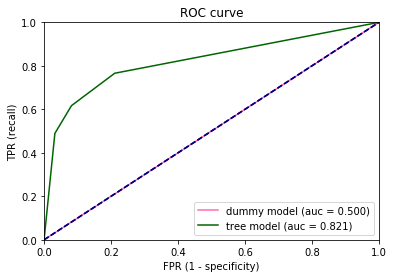

In [53]:
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, dummy.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_dummy, tpr_dummy, 'dummy model', 'hotpink')
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plot_roc_curve(fpr_tree, tpr_tree, 'tree model', 'darkgreen')

## EX-4: Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [58]:
score = cross_val_score(tree, X_train, y_train); score

array([ 0.93555556,  0.93541203,  0.93303571])

In [59]:
#Change k
scores = cross_val_score(tree, X_train, y_train, cv=5); scores
#cv는 데이터를 5개로 쪼개라

array([ 0.92962963,  0.93703704,  0.92962963,  0.94052045,  0.92910448])

In [61]:
print("Mean: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(),scores.min(),scores.max()))

Mean: 0.933
Min: 0.929
Max: 0.941


In [63]:
#Change performace measure
cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')

array([ 0.8243408 ,  0.86625514,  0.87768633,  0.92283951,  0.87738398])

## EX-5: Model Tuning